# SBIM Twitter Analysis

In [1]:
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy.streaming import StreamListener
import time
import json
import re
!pip install unidecode
import unidecode
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 1000)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 12.7 MB/s 


In [2]:
entity = 'bsi'
agency_twitter = 'SBInfectologia'

In [3]:
# setup security 
access_token = '1006599768104144896-08Q8MuqehWAXLYxH4qfQPd3ihda2WW'
access_token_secret = 'hZGfKdUzY1t2jUrA5t2egNhoKTPCz457orKvFVVDD117G'
consumer_key = 'mVDo4ha0iWDHYXdalHH6g8tx7'
consumer_secret = 'A6vRmL8VmLwpncQD2at0PHkzBswjT7m70BWmpv0rMkxBbvIoan'

In [4]:
# setup file store
from google.colab import drive
drive.mount('/content/drive/')
path_drive = '/content/drive/My Drive/[UFU] Pesquisa/MobiSocial 2022/'
file = path_drive + entity + '/' + entity + '_tweets.json'
edges_file = path_drive + entity + '/' + entity + '_hashtags.csv'

Mounted at /content/drive/


# Getting tweets

In [ ]:
import tweepy #https://github.com/tweepy/tweepy
import csv

def get_all_tweets(screen_name, filew):
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)

    alltweets = []

    new_tweets = api.user_timeline(screen_name = screen_name,count=200,tweet_mode='extended')

    for tweet in new_tweets:
        json_str = json.dumps(tweet._json)
        filew.write(json_str + '\n')
    
    alltweets.extend(new_tweets)

    oldest = alltweets[-1].id - 1

    while len(new_tweets) > 0:
        print ("getting tweets before %s" % (oldest))

        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest,tweet_mode='extended')

        for tweet in new_tweets:
            json_str = json.dumps(tweet._json)
            filew.write(json_str + '\n')
        
        alltweets.extend(new_tweets)

        oldest = alltweets[-1].id - 1

        print ("...%s tweets downloaded so far" % (len(alltweets)))
        
filew = open(file, 'w')
get_all_tweets(agency_twitter, filew)
filew.close()


getting tweets before 1323664373198499842
...399 tweets downloaded so far
getting tweets before 1240663195452354559
...564 tweets downloaded so far
getting tweets before 1178782502011461632
...564 tweets downloaded so far


## Hashtags network

In [ ]:
with open(file, 'r') as f:
    alltweets = f.readlines()

texts = []
for tweet_line in alltweets:   
    tweet = json.loads(tweet_line)
    texts.append(tweet['full_text'])

print(len(texts))

564


In [ ]:
## get hashtags
def extract_hash_tags(s):
    return set(part[1:] for part in s.split() if part.startswith('#'))

def normalize_text(s):
    s = re.sub(r'[^\w\s]','',s)
    s = s.lower()
    s = unidecode.unidecode(s)
    return s

allhashtags = set()
hashtagsList = []
for i, text in enumerate(texts):
    wordList = extract_hash_tags(text)
    if wordList:
        hashtags = [normalize_text(w) for w in wordList]
        for w in hashtags:
            allhashtags.add(w)
        print(i, wordList, hashtags)
        hashtagsList.append(hashtags)

print('\n### Tamanho total do conjunto de hashtags:', len(allhashtags))
print('\n### Quantidade de listas de hashtags:', len(hashtagsList))

10 {'sbinfectologia'} ['sbinfectologia']
18 {'infecto2021'} ['infecto2021']
20 {'sbinfecto', 'infecto2021'} ['sbinfecto', 'infecto2021']
21 {'infecto2021'} ['infecto2021']
23 {'infecto2021'} ['infecto2021']
40 {'sepse,'} ['sepse']
49 {'vacinacao', 'vacina'} ['vacinacao', 'vacina']
58 {'orgulholgbt', 'Pride2021'} ['orgulholgbt', 'pride2021']
78 {'infecto…'} ['infecto']
90 {'diadoinfectologia'} ['diadoinfectologia']
95 {'sbinfectologia', 'Tuberculose'} ['sbinfectologia', 'tuberculose']
99 {'marçolilas'} ['marcolilas']
105 {'mulheres', 'mulher', 'infectologia', 'diainternacionaldamulher', 'IWD2021', 'sbinfectologia', 'medicina'} ['mulheres', 'mulher', 'infectologia', 'diainternacionaldamulher', 'iwd2021', 'sbinfectologia', 'medicina']
126 {'leptospirose'} ['leptospirose']
135 {'worldaspergilosisday'} ['worldaspergilosisday']
176 {'COVID19'} ['covid19']
183 {'WorldAIDSDay'} ['worldaidsday']
203 {'EndPolioNow', 'sbinfectologia'} ['endpolionow', 'sbinfectologia']
208 {'infectologia…'} ['infe

In [ ]:
## normalizing hashtaghs
def normalize(hashtag):
    if hashtag == '2019ncov': return 'covid19'
    return hashtag
  

for hashtags in hashtagsList:
    for i in range(len(hashtags)):
        hashtags[i] = normalize(hashtags[i])

In [ ]:
## building the network
edges = {}
for hashtags in hashtagsList:
    for i in range(len(hashtags)):
        for j in range(i+1, len(hashtags)):
            key = hashtags[i] + '-' + hashtags[j]
            edge = (hashtags[i], hashtags[j], 1)
            if key in edges:
                (h1, h2, w) = edges[key]
                edge = (h1, h2, w+1)
                edges.update( {key : edge} )
            else:
                edges.update( {key : edge} )
            print(edge)

('sbinfecto', 'infecto2021', 1)
('vacinacao', 'vacina', 1)
('orgulholgbt', 'pride2021', 1)
('sbinfectologia', 'tuberculose', 1)
('mulheres', 'mulher', 1)
('mulheres', 'infectologia', 1)
('mulheres', 'diainternacionaldamulher', 1)
('mulheres', 'iwd2021', 1)
('mulheres', 'sbinfectologia', 1)
('mulheres', 'medicina', 1)
('mulher', 'infectologia', 1)
('mulher', 'diainternacionaldamulher', 1)
('mulher', 'iwd2021', 1)
('mulher', 'sbinfectologia', 1)
('mulher', 'medicina', 1)
('infectologia', 'diainternacionaldamulher', 1)
('infectologia', 'iwd2021', 1)
('infectologia', 'sbinfectologia', 1)
('infectologia', 'medicina', 1)
('diainternacionaldamulher', 'iwd2021', 1)
('diainternacionaldamulher', 'sbinfectologia', 1)
('diainternacionaldamulher', 'medicina', 1)
('iwd2021', 'sbinfectologia', 1)
('iwd2021', 'medicina', 1)
('sbinfectologia', 'medicina', 1)
('endpolionow', 'sbinfectologia', 1)
('zika', 'virus', 1)
('coronavirus', 'covid19', 1)
('zika', 'ciencia', 1)
('zika', 'aedes', 1)
('zika', 'viru

In [ ]:
## generating edges file
filew = open(edges_file, 'w')
filew.write('Source,Target,weight\n')
print('Source,Target,weight')
for key, edge in edges.items():
    (h1,h2,w) = edge
    if h1 and h2:
        edgeLine = h1 + ',' + h2 + ',' + str(w)
        print(edgeLine)
        filew.write(edgeLine + '\n')
        
filew.close()    

Source,Target,weight
sbinfecto,infecto2021,1
vacinacao,vacina,1
orgulholgbt,pride2021,1
sbinfectologia,tuberculose,1
mulheres,mulher,1
mulheres,infectologia,1
mulheres,diainternacionaldamulher,1
mulheres,iwd2021,1
mulheres,sbinfectologia,1
mulheres,medicina,1
mulher,infectologia,1
mulher,diainternacionaldamulher,1
mulher,iwd2021,1
mulher,sbinfectologia,1
mulher,medicina,1
infectologia,diainternacionaldamulher,1
infectologia,iwd2021,1
infectologia,sbinfectologia,5
infectologia,medicina,4
diainternacionaldamulher,iwd2021,1
diainternacionaldamulher,sbinfectologia,1
diainternacionaldamulher,medicina,1
iwd2021,sbinfectologia,1
iwd2021,medicina,1
sbinfectologia,medicina,5
endpolionow,sbinfectologia,1
zika,virus,2
coronavirus,covid19,13
zika,ciencia,1
zika,aedes,1
ciencia,aedes,1
ciencia,virus,1
aedes,virus,1
sbinfectologia,mascarasalva,1
sbinfectologia,coronavirus,8
sbinfectologia,covid19,13
mascarasalva,coronavirus,1
mascarasalva,covid19,1
sbinfectologia,transparencia,1
transparencia,corona

# Engagement analysis

In [5]:
with open(file, 'r') as f:
    alltweets = f.readlines()

texts = []
for tweet_line in alltweets:   
    tweet = json.loads(tweet_line)
    engaged = tweet['retweet_count'] + tweet['favorite_count'] + len(tweet['entities']['user_mentions'])
    texts.append([tweet['id_str'],tweet['created_at'],tweet['retweet_count'],tweet['favorite_count'],len(tweet['entities']['user_mentions']),tweet['is_quote_status'],engaged,tweet['full_text']])

columns = ['id','created_at','rt_count','fav_count','mentions_count','is_quote','engaged','text']
df = pd.DataFrame(texts, columns=columns)
total_tweets = len(df)
print('Total tweets: ', total_tweets)

df.head()

Total tweets:  564


,id,created_at,rt_count,fav_count,mentions_count,is_quote,engaged,text
0,1509259072012537861,Wed Mar 30 19:59:38 +0000 2022,1,10,1,False,12,"Realizada hoje, em São Paulo, importante e proveitosa reunião entre as diretorias da @AMB_oficial e da SBI. Orgulho de nosso compromisso conjunto, sempre em prol da saúde dos brasileiros. https://t.co/4ocbxmVudj"
1,1507058186364362755,Thu Mar 24 18:14:06 +0000 2022,9,17,0,False,26,"A tuberculose mata 4,7 mil pessoas/ano no Brasil. Os sintomas se confundem com os da gripe, o que faz com que o diagnóstico possa levar meses. Fique atento: tosse seca ou com secreção por mais de 15 dias pode ser um sinal da tuberculose. Procure um médico. https://t.co/KcHQHLUk8N"
2,1506297835720953858,Tue Mar 22 15:52:44 +0000 2022,21,30,0,False,51,"IMPORTANTE || A diretoria da Sociedade Brasileira de Infectologia (SBI) elaborou um documento com recomendações atualizadas sobre o uso de máscaras no atual momento da pandemia de COVID-19.\nPara ler o documento, por favor visite o link. https://t.co/lEEylp9BKv https://t.co/9SsLq0eShV"
3,1502037362569887750,Thu Mar 10 21:43:08 +0000 2022,79,173,0,False,252,"USO DE MÁSCARA || ""Uma flexibilização indiscriminada pode ampliar os riscos à população, ainda mais à parcela não vacinada ou com esquema incompleto e principalmente os imunocomprometidos."" Para ler o comunicado completo do CEM COVID_AMB, confira o link: | https://t.co/WWaVdn3KXO https://t.co/kPqNyYtLMB"
4,1492152240131432450,Fri Feb 11 15:03:11 +0000 2022,4,15,0,False,19,"A SBI divulga nota a respeito de reforço (""quarta dose"") do esquema vacinal contra COVID. Nesse momento é fundamental vacinar o país com o esquema vacinal de duas doses (ou dose única) mais a dose de reforço após quatro meses. | https://t.co/49aJENvsqF https://t.co/2o8fwUgPUC"


In [6]:
## counting number of engaged tweets
def engaged_tweets(df):
    #return df[(df.rt_count > 0) | (df.fav_count > 0)].count()
    return df[(df.engaged > 0)].count()

def not_engaged_tweets(df):
    return df[(df.engaged == 0)].count()

def engaged_rt_tweets(df):
    return df[(df.rt_count > 0)].count()

def engaged_fav_tweets(df):
    return df[(df.fav_count > 0)].count()

def engaged_mention_tweets(df):
    return df[(df.mentions_count > 0)].count()

sum_engaged_tweets = engaged_tweets(df)
print('Engaged tweets: ', sum_engaged_tweets['rt_count'], sum_engaged_tweets['rt_count']*100/total_tweets)
sum_engaged_rt_tweets = engaged_rt_tweets(df)
print('Engaged rt tweets: ', sum_engaged_rt_tweets['rt_count'], sum_engaged_rt_tweets['rt_count']*100/sum_engaged_tweets['rt_count'])
sum_engaged_fav_tweets = engaged_fav_tweets(df)
print('Engaged fav tweets: ', sum_engaged_fav_tweets['fav_count'], sum_engaged_fav_tweets['fav_count']*100/sum_engaged_tweets['fav_count'])
sum_engaged_mention_tweets = engaged_mention_tweets(df)
print('Engaged mention tweets: ', sum_engaged_mention_tweets['mentions_count'], sum_engaged_mention_tweets['mentions_count']*100/sum_engaged_tweets['mentions_count'])
sum_not_engaged_tweets = not_engaged_tweets(df)
print('Not Engaged tweets: ', sum_not_engaged_tweets['rt_count'], sum_not_engaged_tweets['rt_count']*100/total_tweets)

Engaged tweets:  546 96.80851063829788
Engaged rt tweets:  378 69.23076923076923
Engaged fav tweets:  452 82.78388278388279
Engaged mention tweets:  240 43.956043956043956
Not Engaged tweets:  18 3.1914893617021276


In [7]:
## getting most engaged tweets

df = df.sort_values(by=['engaged'],ascending=False)
df.head(10)

,id,created_at,rt_count,fav_count,mentions_count,is_quote,engaged,text
152,1349856405612859397,Thu Jan 14 23:10:20 +0000 2021,6458,14327,0,False,20785,"A SBI não recomenda tratamento precoce para COVID-19 com qualquer medicamento (cloroquina,\nhidroxicloroquina, ivermectina, azitromicina, nitazoxanida, corticoide, zinco, vitaminas, anticoagulante, ozônio por via retal, dióxido de cloro), porque os estudos clínicos (segue)"
151,1349856514786222081,Thu Jan 14 23:10:46 +0000 2021,967,4672,0,False,5639,"randomizados com grupo controle existentes até o momento não mostraram benefício e, além disso, alguns destes medicamentos podem causar efeitos\ncolaterais. Ou seja, não existe comprovação científica de que esses medicamentos sejam eficazes contra a COVID-19. (segue)"
148,1349857578810036224,Thu Jan 14 23:15:00 +0000 2021,669,3476,0,False,4145,Texto presente no documento ATUALIZAÇÕES E RECOMENDAÇÕES SOBRE A COVID-19\nElaborado em 09/12/2020. Disponível em nosso site e redes sociais. https://t.co/EwZAxRHpvJ
150,1349856734450479104,Thu Jan 14 23:11:39 +0000 2021,507,3211,0,False,3718,"Essa orientação da SBI está alinhada com as recomendações das seguintes sociedades médicas científicas e outros organismos sanitários nacionais e internacionais, como: Sociedade de Infectologia dos EUA (IDSA) e da Europa\n(ESCMID), Instituto Nacional de Saúde dos EUA (NIH) (segue)"
149,1349857175682867206,Thu Jan 14 23:13:24 +0000 2021,435,2940,0,False,3375,"Centos Norte-Americanos de Controle e Prevenção de Doenças (CDC), Organização Mundial da Saúde (OMS) e Agência Nacional de Vigilância do Ministério da Saúde do Brasil (ANVISA)."
27,1452304844987973647,Sun Oct 24 16:03:52 +0000 2021,745,2437,0,False,3182,"IMPORTANTE || ""Pessoas que vivem com HIV/AIDS devem ser completamente vacinados para COVID-19. Destacamos inclusive a liberação da dose de reforço (terceira dose) para todos que receberam a segunda dose há mais de 28 dias.""\nLeia a nota de esclarecimento | https://t.co/xjp40B6c4t https://t.co/eIFCJNXj89"
290,1284231204934483968,Fri Jul 17 20:59:13 +0000 2020,945,2103,0,False,3048,"Com base em dois estudos robustos publicados em 16/7 (EUA/Canadá e Espanha), a SBI acompanha sociedades médicas científicas internacionais e a OMS e recomenda o abandono URGENTE da hidroxicloroquina para qualquer fase do tratamento da COVID-19. | https://t.co/MGJ4oTSN0u https://t.co/v3yYATHFXH"
176,1336751492318060549,Wed Dec 09 19:16:06 +0000 2020,331,1221,0,False,1552,"Caros colegas médicos, profissionais de Saúde, imprensa e população. A Sociedade Brasileira de Infectologia (SBI) divulga suas mais recentes atualizações e recomendações sobre a COVID-19. O documento pode ser acessado por meio deste link. | https://t.co/EwZAxRHpvJ |\n#COVID19 https://t.co/f5UvhjpdHT"
87,1384153348752826380,Mon Apr 19 14:34:09 +0000 2021,1159,0,1,False,1160,RT @TaschnerNatalia: Olha que resultados promissores da efetividade - como a vacina funciona no mundo real - da Coronavac no Chile. https:/…
147,1350248380266655745,Sat Jan 16 01:07:54 +0000 2021,54,1062,1,False,1117,"@AiltonBenedito A SBI é completamente a favor do “tratamento precoce” para a COVID-19, assim que qualquer fármaco demonstrar segurança e eficácia, o que, infelizmente, até a presente data não ocorreu. Leia com atenção os 44 artigos enviados em resposta ao ofício que V. Exa. nos encaminhou."


In [8]:
## getting collect period
pd.to_datetime(df['created_at'], format="%a %b %d %H:%M:%S +0000 %Y").sort_values()

563   2019-09-30 21:23:43
562   2019-10-01 18:17:31
561   2019-10-02 18:21:23
560   2019-10-02 20:44:03
559   2019-10-03 18:30:44
              ...        
4     2022-02-11 15:03:11
3     2022-03-10 21:43:08
2     2022-03-22 15:52:44
1     2022-03-24 18:14:06
0     2022-03-30 19:59:38
Name: created_at, Length: 564, dtype: datetime64[ns]

In [9]:
## most mentioned users
with open(file, 'r') as f:
    alltweets = f.readlines()

mentions = {}
for tweet_line in alltweets:   
    tweet = json.loads(tweet_line)
    user_mentions = tweet['entities']['user_mentions']
    for user in user_mentions:
        key = user['screen_name']
        if key in mentions:
            count = mentions[key]
            mentions.update( {key : count+1} )
        else:
            mentions.update( {key : 1} )
        
for w in sorted(mentions, key=mentions.get, reverse=True):
    print(w, mentions[w])


minsaude 30
SP_Infectologia 25
CimermanSergio 20
VejaSaude 20
Leo_Weissmann 14
Estadao 13
AMB_oficial 9
g1 6
vivabem_uol 5
CNNBrasil 5
fiocruz 5
folha 5
get_repost 5
SBIm_Nacional 4
SBInfectologia 4
andre_biernath 4
agencia_fiocruz 4
collucciclaudia 3
portalR7 3
UOL 3
jornalhoje 3
RedEMCInfecto 3
WHO 3
SBPediatria 2
NaimeDr 2
agencialupa 2
anvisa_oficial 2
JovemPanNews 2
bbcbrasil 2
endocrinologia 2
butantanoficial 2
SBHepatologia 2
chrisreiskobal 2
ufrj 2
unifesp 2
RadioSenado 2
bemestar 2
agenciaaids 2
juliocroda 1
danilotovo 1
felipe_grandin 1
giulianamorrone 1
alvaropereirajr 1
APECIH1 1
inifiocruz 1
Infectologia_uy 1
OGlobo_Saude 1
TaschnerNatalia 1
Emerson36110636 1
GloboNews 1
PauloStFlexa 1
DeInfectologia 1
UnisaOficial 1
madeleinelacsko 1
LuciannoLeite 1
cartermariano 1
Luiz65685501 1
instEmilioRibas 1
AiltonBenedito 1
padilhando 1
marivarella 1
sbmfc 1
ABRASCO 1
NormaSouto1 1
tadeudramos 1
sbc_cientifico 1
ChooseWiselyBR 1
fernando_ncf 1
Institutodor 1
OhioStateMed 1
ABTO 1
I

# Temporal Analysis

In [10]:
total = len(df)
print('Total number of tweets: ', total)

Total number of tweets:  564


Text(0.5, 1.0, 'bsi tweets distribution per month')

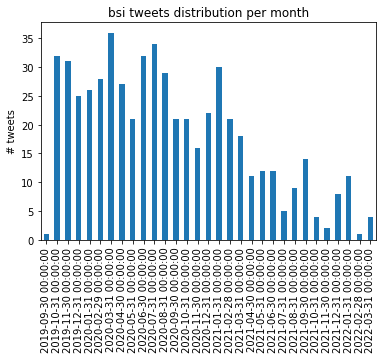

In [11]:
## temporal analysis
import matplotlib.pyplot as plt
import numpy
%matplotlib inline

df['date'] = pd.to_datetime(df['created_at'], format="%a %b %d %H:%M:%S +0000 %Y")

g = df.groupby(pd.Grouper(key='date',freq="M"))
g['id'].count().plot(kind="bar")
plt.ylabel('# tweets')
plt.xlabel('')
plt.title(entity + ' tweets distribution per month')

Text(0.5, 1.0, 'bsi tweets distribution per week')

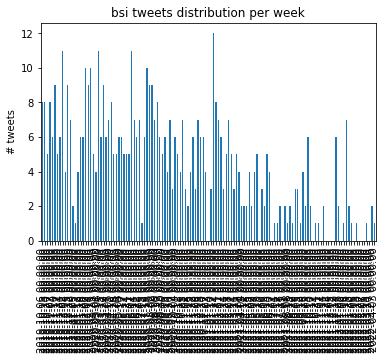

In [12]:
## temporal analysis
import numpy
%matplotlib inline

df['date'] = pd.to_datetime(df['created_at'], format="%a %b %d %H:%M:%S +0000 %Y")

g = df.groupby(pd.Grouper(key='date',freq="W"))
g['id'].count().plot(kind="bar")
plt.ylabel('# tweets')
plt.xlabel('')
plt.title(entity + ' tweets distribution per week')

Text(0.5, 1.0, 'bsi number of tweets per day')

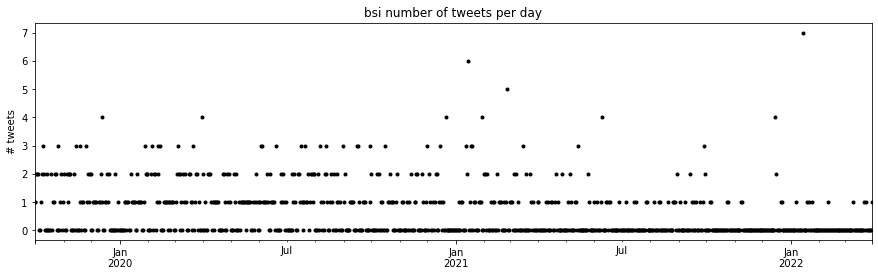

In [13]:
## temporal analysis
import numpy
%matplotlib inline
plt.figure(figsize=(15,4))
df['date'] = pd.to_datetime(df['created_at'], format="%a %b %d %H:%M:%S +0000 %Y")

g = df.groupby(pd.Grouper(key='date',freq="D"))
g['id'].count().plot(style="k.")
plt.ylabel('# tweets')
plt.xlabel('')
plt.title(entity + ' number of tweets per day')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Figure size 1080x288 with 0 Axes>

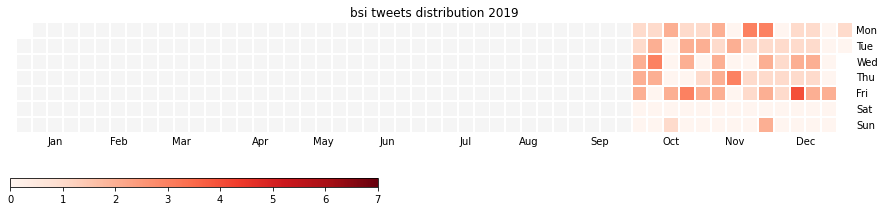

In [14]:
## temporal analysis
import numpy
!pip install calmap
import calmap
%matplotlib inline
plt.figure(figsize=(15,4))
df['date'] = pd.to_datetime(df['created_at'], format="%a %b %d %H:%M:%S +0000 %Y")

g = df.groupby(pd.Grouper(key='date',freq="D"))
quantities = g['id'].count()

year = 2019
fig = plt.figure(figsize=(15,6))
plt.title(entity + ' tweets distribution ' + str(year))
#ax = fig.add_subplot(111)
cax = calmap.yearplot(quantities, year=year)
#fig.colorbar(cax.get_children()[1], ax=cax, orientation='vertical', aspect=2)

cbar_ax = fig.add_axes([0.12, 0.25, 0.34, 0.02])
fig.colorbar(cax.get_children()[1], cax=cbar_ax, orientation="horizontal")

<Figure size 1080x288 with 0 Axes>

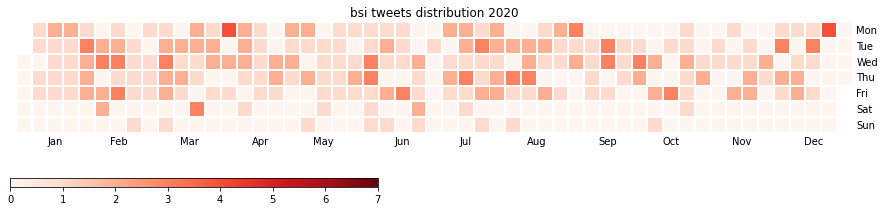

In [15]:
## temporal analysis
import numpy
#!pip install calmap
import calmap
%matplotlib inline
plt.figure(figsize=(15,4))
df['date'] = pd.to_datetime(df['created_at'], format="%a %b %d %H:%M:%S +0000 %Y")

g = df.groupby(pd.Grouper(key='date',freq="D"))
quantities = g['id'].count()

year = 2020
fig = plt.figure(figsize=(15,6))
plt.title(entity + ' tweets distribution ' + str(year))
#ax = fig.add_subplot(111)
cax = calmap.yearplot(quantities, year=year)
#fig.colorbar(cax.get_children()[1], ax=cax, orientation='vertical', aspect=2)

cbar_ax = fig.add_axes([0.12, 0.25, 0.34, 0.02])
fig.colorbar(cax.get_children()[1], cax=cbar_ax, orientation="horizontal")

<Figure size 1080x288 with 0 Axes>

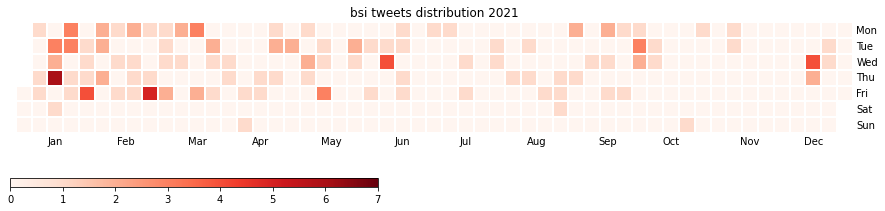

In [16]:
## temporal analysis
import numpy
#!pip install calmap
import calmap
%matplotlib inline
plt.figure(figsize=(15,4))
df['date'] = pd.to_datetime(df['created_at'], format="%a %b %d %H:%M:%S +0000 %Y")

g = df.groupby(pd.Grouper(key='date',freq="D"))
quantities = g['id'].count()

year = 2021
fig = plt.figure(figsize=(15,6))
plt.title(entity + ' tweets distribution ' + str(year))
#ax = fig.add_subplot(111)
cax = calmap.yearplot(quantities, year=year)
#fig.colorbar(cax.get_children()[1], ax=cax, orientation='vertical', aspect=2)

cbar_ax = fig.add_axes([0.12, 0.25, 0.34, 0.02])
fig.colorbar(cax.get_children()[1], cax=cbar_ax, orientation="horizontal")

<Figure size 1080x288 with 0 Axes>

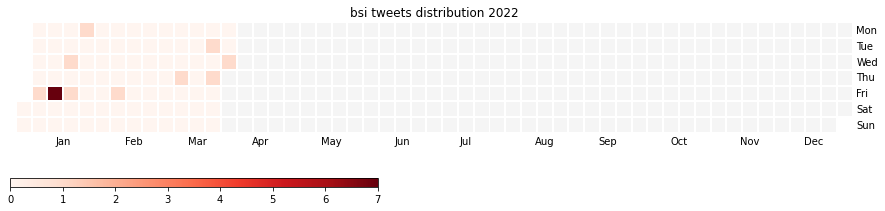

In [17]:
## temporal analysis
import numpy
#!pip install calmap
import calmap
%matplotlib inline
plt.figure(figsize=(15,4))
df['date'] = pd.to_datetime(df['created_at'], format="%a %b %d %H:%M:%S +0000 %Y")

g = df.groupby(pd.Grouper(key='date',freq="D"))
quantities = g['id'].count()

year = 2022
fig = plt.figure(figsize=(15,6))
plt.title(entity + ' tweets distribution ' + str(year))
#ax = fig.add_subplot(111)
cax = calmap.yearplot(quantities, year=year)
#fig.colorbar(cax.get_children()[1], ax=cax, orientation='vertical', aspect=2)

cbar_ax = fig.add_axes([0.12, 0.25, 0.34, 0.02])
fig.colorbar(cax.get_children()[1], cax=cbar_ax, orientation="horizontal")

Text(0.5, 1.0, 'bsi tweets distribution per hour')

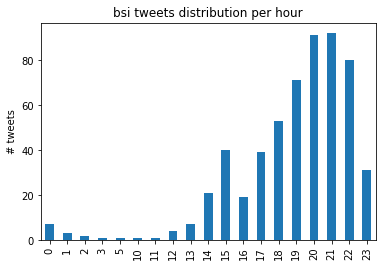

In [18]:
df.groupby(df['date'].dt.hour)['id'].count().plot(kind="bar")
plt.ylabel('# tweets')
plt.xlabel('')
plt.title(entity + ' tweets distribution per hour')

# Trending analysis

In [19]:
import datetime
baseline_str = '2019-09-30'
baseline_date = datetime.datetime.strptime(baseline_str, '%Y-%m-%d')
baseline_date = baseline_date.date()
df['just_date'] = df['date'].apply(datetime.datetime.date)
baseline = df[df['just_date'] == baseline_date]
baseline_count = 0
if len(baseline) > 0:
    baseline_count = baseline.groupby('just_date').count()['id'][0]
print(baseline_count)

1


In [20]:
import math

def change_function(count):
    if math.isnan(count):
        count = 0
    if count == baseline_count:
        return 0
    change = 100*(count-baseline_count)/baseline_count
    return change

df_grouped = df.groupby('just_date', as_index=False).count()
df_grouped['change'] = df_grouped['date'].apply(change_function)
df_grouped.head(5)

,just_date,id,created_at,rt_count,fav_count,mentions_count,is_quote,engaged,text,date,change
0,2019-09-30,1,1,1,1,1,1,1,1,1,0.0
1,2019-10-01,1,1,1,1,1,1,1,1,1,0.0
2,2019-10-02,2,2,2,2,2,2,2,2,2,100.0
3,2019-10-03,2,2,2,2,2,2,2,2,2,100.0
4,2019-10-04,2,2,2,2,2,2,2,2,2,100.0


In [21]:
import datetime as dt
# generate pandas with reference_date from 2020-09-28 to 2022-02-01
start = datetime.datetime.strptime("30-09-2019", "%d-%m-%Y")
end = datetime.datetime.strptime("01-02-2022", "%d-%m-%Y")
date_generated = [start + dt.timedelta(days=x) for x in range(0, (end-start).days)]

agencies_df = pd.DataFrame()
agencies_df['date_created'] = date_generated
agencies_df['date_created'] = agencies_df['date_created'].map(lambda x: x.date())
print(len(agencies_df))
agencies_df.head()

855


,date_created
0,2019-09-30
1,2019-10-01
2,2019-10-02
3,2019-10-03
4,2019-10-04


In [22]:
agencies_df = pd.merge(agencies_df, df_grouped, how='left', left_on='date_created', right_on='just_date')
agencies_df['change'] = agencies_df['date'].apply(change_function)
agencies_df = agencies_df.sort_values(by='date_created')
agencies_df['order'] = range(1, 1+len(agencies_df))
agencies_df.head()

,date_created,just_date,id,created_at,rt_count,fav_count,mentions_count,is_quote,engaged,text,date,change,order
0,2019-09-30,2019-09-30,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
1,2019-10-01,2019-10-01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2
2,2019-10-02,2019-10-02,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,100.0,3
3,2019-10-03,2019-10-03,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,100.0,4
4,2019-10-04,2019-10-04,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,100.0,5


In [23]:
agencies_df.tail(42)

,date_created,just_date,id,created_at,rt_count,fav_count,mentions_count,is_quote,engaged,text,date,change,order
813,2021-12-21,2021-12-21,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,814
814,2021-12-22,2021-12-22,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,815
815,2021-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-100.0,816
816,2021-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-100.0,817
817,2021-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-100.0,818
818,2021-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-100.0,819
819,2021-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-100.0,820
820,2021-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-100.0,821
821,2021-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-100.0,822
822,2021-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-100.0,823


<Figure size 1080x720 with 0 Axes>

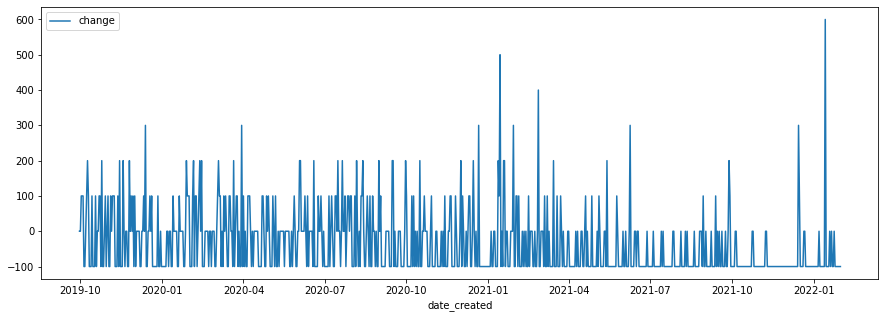

In [24]:
plt.figure(figsize=(15,10))
agencies_df.plot(kind='line', x='date_created', y='change',figsize=(15, 5))
plt.show()

In [28]:
mark_firstcase = agencies_df[agencies_df['date_created']==datetime.date(2020,2,26)]['order'].to_list()[0]
mark_firstmh = agencies_df[agencies_df['date_created']==datetime.date(2020,4,16)]['order'].to_list()[0]
mark_secondmh = agencies_df[agencies_df['date_created']==datetime.date(2020,5,15)]['order'].to_list()[0]
mark_thirdmh = agencies_df[agencies_df['date_created']==datetime.date(2020,6,2)]['order'].to_list()[0]

mark_firstvaccine = agencies_df[agencies_df['date_created']==datetime.date(2020,12,2)]['order'].to_list()[0]
mark_gamma = agencies_df[agencies_df['date_created']==datetime.date(2021,1,6)]['order'].to_list()[0]

mark_brazilvaccine = agencies_df[agencies_df['date_created']==datetime.date(2021,1,17)]['order'].to_list()[0]
mark_fourthmh = agencies_df[agencies_df['date_created']==datetime.date(2021,3,23)]['order'].to_list()[0]
mark_deadliest = agencies_df[agencies_df['date_created']==datetime.date(2021,3,29)]['order'].to_list()[0]
mark_cpi = agencies_df[agencies_df['date_created']==datetime.date(2021,4,27)]['order'].to_list()[0]
mark_omicron = agencies_df[agencies_df['date_created']==datetime.date(2021,11,26)]['order'].to_list()[0]
mark_topcases = agencies_df[agencies_df['date_created']==datetime.date(2022,1,27)]['order'].to_list()[0]

list_marks = [mark_firstcase, mark_firstmh, mark_secondmh, mark_thirdmh, mark_firstvaccine, mark_gamma,
              mark_brazilvaccine, mark_fourthmh, mark_deadliest, mark_cpi, mark_omicron, mark_topcases]
list_labels = ['1stBraCase', '1stMH', '2ndMH', '3rdMH', '1stVac', 'GAMMA', '1stBraVac', '4thMH', 'BraDeadliest',
               'PCI', 'Omicron', 'BraTopCases']
list_marks

[150, 200, 229, 247, 430, 465, 476, 541, 547, 576, 789, 851]

[-200.    0.  200.  400.  600.  800. 1000.]
<a list of 7 Text major ticklabel objects>


Text(0.5, -0.2, 'BSI')

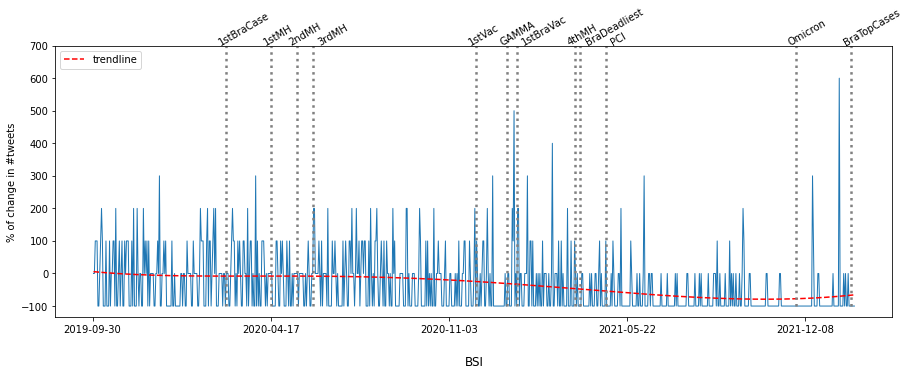

In [32]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def adjust_xticks(value):
    if value < 0:
      return ''
    start_date = agencies_df[agencies_df['order']==1]['date_created'][0]
    end_date = start_date + datetime.timedelta(days=value)
    label = str(end_date)
    return label


fig, ax = plt.subplots(figsize=(15,5))

# changes
x = agencies_df['order'].to_numpy()
y = agencies_df['change'].to_numpy()
x_new = np.linspace(x.min(), x.max(),len(agencies_df))
f = interp1d(x, y, kind='quadratic')
y_smooth=f(x_new)
ax.plot (x_new,y_smooth, linewidth=1.0)
ax.set_ylim(top=max(y_smooth)+100)
ax.set_ylabel('% of change in #tweets')

locs, labels = plt.xticks()
print(locs)
print(labels)
ax.set_xticklabels(np.array(list(map(adjust_xticks, locs))))

# baseline
##x_baseline = x
##y_baseline = [0]*len(x)
##line2 = ax.plot(x_baseline, y_baseline, '--', linewidth=0.5)

# trendline
z = np.polyfit(x.flatten(), y.flatten(), 5)
p = np.poly1d(z)
ax.plot(x,p(x),"r--", linewidth=1.5, label='trendline')


# marklines
lines = []
for i, mark in enumerate(list_marks):
  x_covidline = [mark]*800
  y_covidline = [i for i in range(-100,700)]
  #x_covidline = [mark]*len(y_smooth)
  #y_covidline = y_smooth
  line = ax.plot(x_covidline, y_covidline, linestyle=':', linewidth=2.5,
                 #label=list_labels[i], 
                 color='gray')
  
  if i in [3, 6, 8, 9]:
    position_x = mark+4
    position_y = 700
  else:
    position_x = mark-10
    position_y = 700
  ax.annotate(list_labels[i], 
             (position_x, position_y), 
             color='black', rotation=30,
             size=10)
  
  lines.append(line)


ax.legend(loc='upper left',# bbox_to_anchor=(0.5, 1.15),
          ncol=1, fancybox=True)
plt.title('BSI', y=-0.2)